# Clustering
Primo algoritmo di clustering, il K-means.
Diversi limiti, tra cui il dover stabilire il numero k di cluster all'inizio.
Adottiamo una misura basata sulla distanza euclidea per stabilire in quanti passi l'algoritmo converge. Adottiamo una metrica chiamata SSE (somma dei quadrati degli errori) chiamata anche inerzia del cluster.
Due modi per ottimizzare l'algoritmo sono : 
* Eseguire più volte l'algoritmo, facendo partire i centroidi da posizioni differenti e calcolando l'SSE di ognuno dei test, quello con l'SSE minore viene privilegiato, per estrarre le posizioni iniziali
* K-means ++ (scrivendo init = 'kmeans++')

Distortion: 72.48


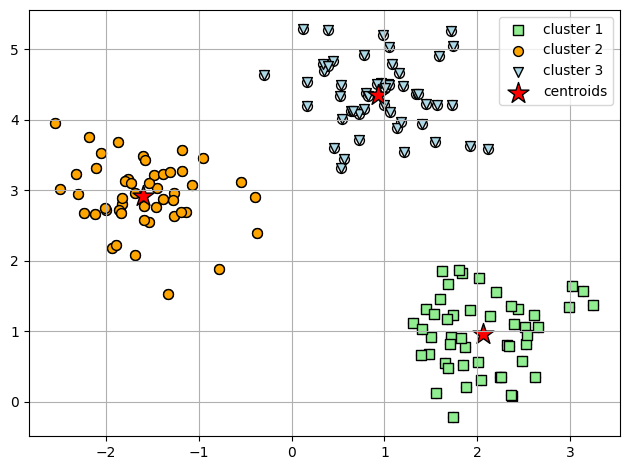

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X,y = make_blobs(n_samples=150, centers=3, n_features=2, cluster_std = 0.5, shuffle = True, random_state=0)
plt.scatter(X[:,0], X[:,1], c = 'white', marker = 'o', edgecolor = 'black', s = 50)

km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')

print('Distortion: %.2f' % km.inertia_)
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()


Esistono algoritmi kmeans, hard e soft : 
* hard : ogni esempio può appartenere soltanto ad un cluster
* soft o fuzzy : ogni esempio può appartenere a più cluster

Un esempio è l'algoritmo fuzzy C-means dove al posto dell'assegnamento semplice ad un cluster, esplicitiamo le probabilità che il punto ci appartenga. 

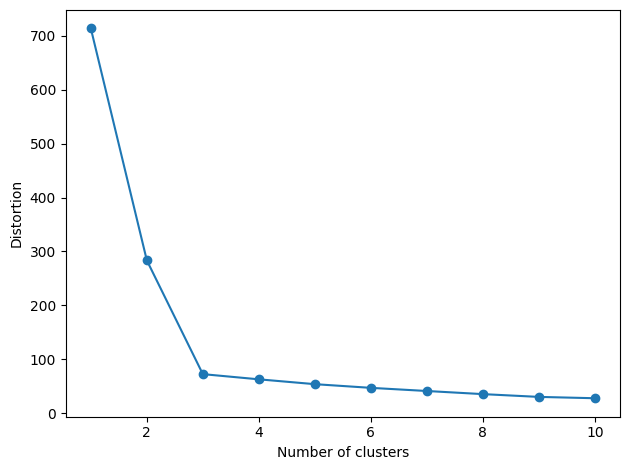

In [3]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

Una metrica intrinseca per valutare la qualità del clustering è l'analisi della silhouette.
Il coefficiente di silhouette si trova attraverso la coesione del cluster $a^{(i)}$ , cioè la distanza media tra un esempio $x^{(i)}$ e tutti gli altri punti contenuti nello stesso cluster, 
la separazione del cluster $b^{(i)}$ dal cluster più vicino, come la distanza media fra l'esempio $x^{(i)}$  e tutti gli esempi contenuti nel cluster più vicino. 
La **silhouette** è la differenza tra la separazione del cluster e la coesione del cluster, diviso la maggiore delle due 